In [2]:
import numpy as np 
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

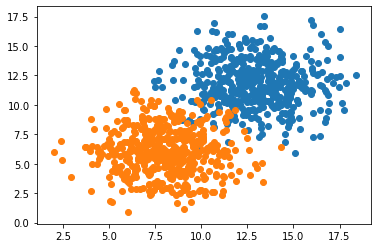

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [4]:
model = Sequential()
#Units = 1 means we have one outout
#inpit_shape = (2,) we have only 2 inputs
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
#lr = learning rate
adam = Adam(lr=0.1)
# binary_crossentropy as we need to just say 0 or 1
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
#Training Model
#Shuffle will mix the training data to ensure we find the real minimum...
h = model.fit(x=X,y=Y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 0s 750us/step - loss: 1.1076 - accuracy: 0.4660
Epoch 2/500
20/20 [==============================] - 0s 800us/step - loss: 0.5099 - accuracy: 0.7690
Epoch 3/500
20/20 [==============================] - 0s 950us/step - loss: 0.3597 - accuracy: 0.8870
Epoch 4/500
20/20 [==============================] - 0s 825us/step - loss: 0.3107 - accuracy: 0.9150
Epoch 5/500
20/20 [==============================] - 0s 700us/step - loss: 0.2714 - accuracy: 0.9370
Epoch 6/500
20/20 [==============================] - 0s 676us/step - loss: 0.2372 - accuracy: 0.9550
Epoch 7/500
20/20 [==============================] - 0s 650us/step - loss: 0.2145 - accuracy: 0.9560
Epoch 8/500
20/20 [==============================] - 0s 625us/step - loss: 0.1957 - accuracy: 0.9630
Epoch 9/500
20/20 [==============================] - 0s 625us/step - loss: 0.1814 - accuracy: 0.9620
Epoch 10/500
20/20 [==============================] - 0s 650us/step - loss: 0.1861 - accura

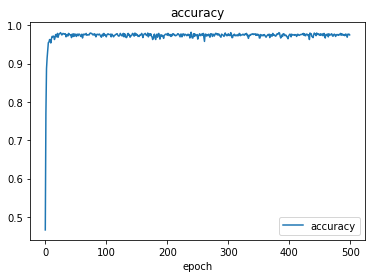

In [5]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

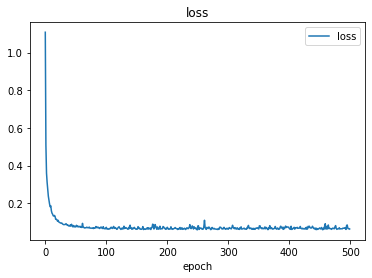

In [6]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.show()

In [7]:
def plot_decision_boundary(X, Y, model):
    #+1 to have it more nicely on the chart... and we want to have a 50x50 grid 
    x_span = np.linspace(min(X[:,0]) -1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) -1 , max(X[:,1]) + 1, 50)
    xx,yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    ##running prediction!
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)    
    plt.contourf(xx,yy,z)

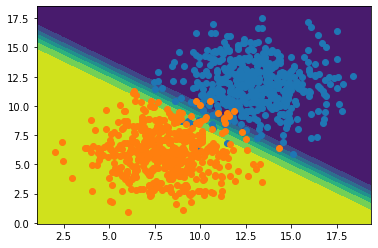

In [8]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prodiction is : [[0.99999106]]


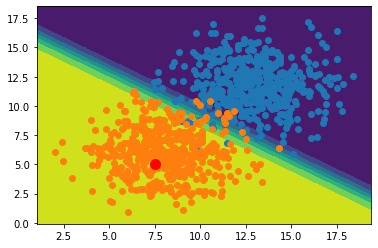

In [9]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
#This is out Test for the model!
inputX = 7.5
inputY = 5
inputPoint = np.array([[inputX,inputY]])
prediction = model.predict(inputPoint)
plt.plot([inputX],[inputY], marker='o', markersize=10, color='red')
print("Prodiction is :", prediction)